In [1]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append('..')
from helper import *

setwd()
Objects = Objects()

In [3]:
id="housing"
con = duckdb.connect(database="data/trusted/db_{}.db".format(id), read_only=True)
df = con.execute("SELECT * FROM {}".format(id)).fetchdf()
con.close

<bound method PyCapsule.close of <duckdb.DuckDBPyConnection object at 0x7ffb04c95030>>

In [4]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7047341204,https://sanantonio.craigslist.org/apa/d/san-an...,san antonio,https://sanantonio.craigslist.org,933,apartment,949,2,1.0,0,...,0,0,0,unknow,unknow,https://images.craigslist.org/00o0o_9r7wpZqorT...,Discover the unbeatable living experience at S...,29.5920,-98.4700,tx
1,7050722769,https://sanantonio.craigslist.org/apa/d/one-of...,san antonio,https://sanantonio.craigslist.org,709,apartment,665,1,1.0,0,...,0,0,0,unknow,unknow,https://images.craigslist.org/00m0m_x4bvyjRBEU...,id-18558 The inviting atmosphere will welcome...,29.5042,-98.5697,tx
2,7047297643,https://sanantonio.craigslist.org/apa/d/san-an...,san antonio,https://sanantonio.craigslist.org,874,apartment,987,2,2.0,0,...,0,0,0,unknow,unknow,https://images.craigslist.org/00d0d_9v7f3ZhKc5...,Primrose at Mission Hills is an active communi...,29.3595,-98.4499,tx
3,7040844249,https://sanantonio.craigslist.org/apa/d/san-an...,san antonio,https://sanantonio.craigslist.org,906,apartment,950,2,1.0,1,...,1,0,0,w/d hookups,street parking,https://images.craigslist.org/00909_hA8nmP9L8L...,Come Home and Unwind Today! Here at Primrose a...,29.4682,-98.5298,tx
4,7050721837,https://sanantonio.craigslist.org/apa/d/san-an...,san antonio,https://sanantonio.craigslist.org,700,apartment,750,2,1.0,0,...,0,0,0,unknow,unknow,https://images.craigslist.org/00w0w_6PcSZa3N9t...,Freshly painted 2 bedroom with stove and refri...,29.3466,-98.5074,tx


In [5]:
numeric_description(df)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
id,7.040982e+09,8.800376e+06,7.003808e+09,7.035979e+09,7.043320e+09,7.048426e+09,7.051292e+09,0.0,0.0
price,8.825722e+03,4.462200e+06,0.000000e+00,8.050000e+02,1.036000e+03,1.395000e+03,2.768307e+09,0.0,0.0
sqfeet,1.059900e+03,1.915076e+04,0.000000e+00,7.500000e+02,9.490000e+02,1.150000e+03,8.388607e+06,0.0,0.0
beds,1.905345e+00,3.494572e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.100000e+03,0.0,0.0
baths,1.480718e+00,6.180605e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.500000e+01,0.0,0.0
cats_allowed,7.268902e-01,4.455574e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0
dogs_allowed,7.079176e-01,4.547206e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0
smoking_allowed,7.317710e-01,4.430381e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0
wheelchair_access,8.211140e-02,2.745347e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,0.0
electric_vehicle_charge,1.287090e-02,1.127177e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,0.0


In [6]:
description_categorical(df)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)
0,url,384977,https://zanesville.craigslist.org/apa/d/zanesv...,https://abilene.craigslist.org/apa/d/2-br/7028...,0,0.00
1,region,404,"jacksonville (4246, 1.1)","kansas city (3, 0.0)",0,0.00
2,region_url,413,"https://fredericksburg.craigslist.org (2747, 0...","https://bigbend.craigslist.org (9, 0.0)",0,0.00
3,type,12,"apartment (318032, 82.61)","assisted living (2, 0.0)",0,0.00
4,laundry_options,6,"w/d in unit (131783, 34.23)","no laundry on site (3624, 0.94)",79026,20.53
5,parking_options,8,"unknow (140687, 36.54)","valet parking (163, 0.04)",140687,36.54
6,image_url,181068,https://images.craigslist.org/00R0R_ciYsssEFRe...,https://images.craigslist.org/00000_10q4ZutX93...,0,0.00
7,description,280835,***Special Move in Today!! $199 With Deposit**...,"! Crest Gateway 1025 West 6th Street, Charl...",4,0.00
8,state,51,"ca (33085, 8.59)","wy (187, 0.05)",0,0.00


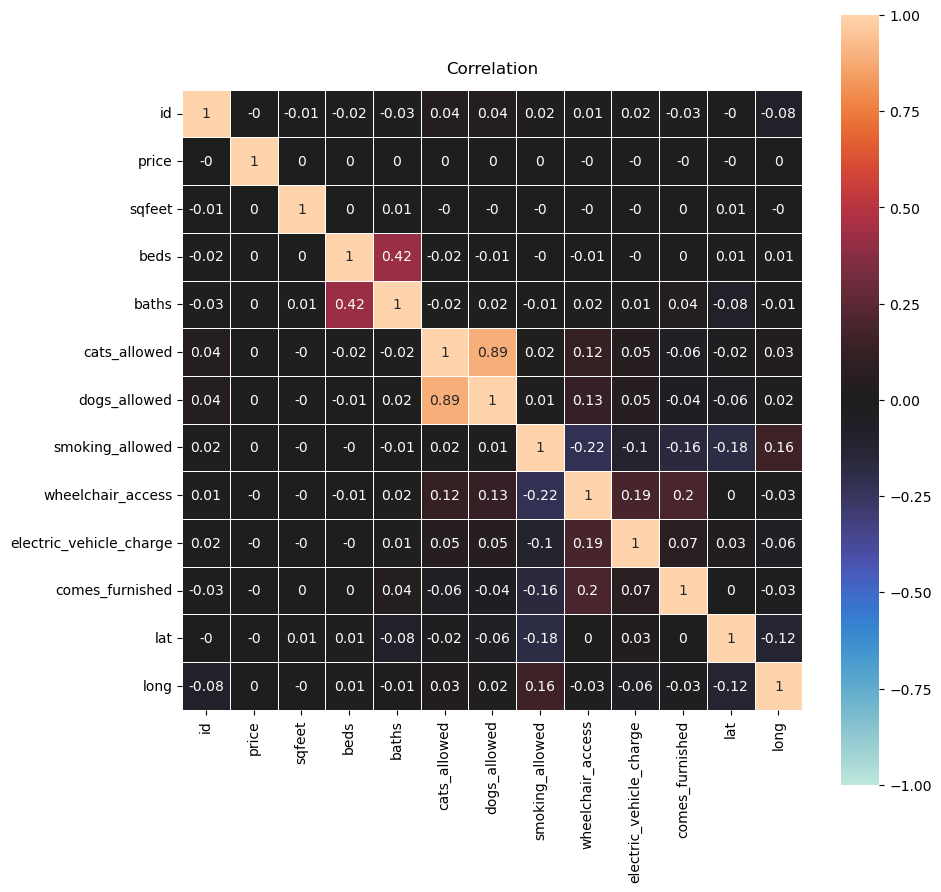

: 

In [7]:
correlation(df)

In [9]:
#scatter(df)

: 

: 

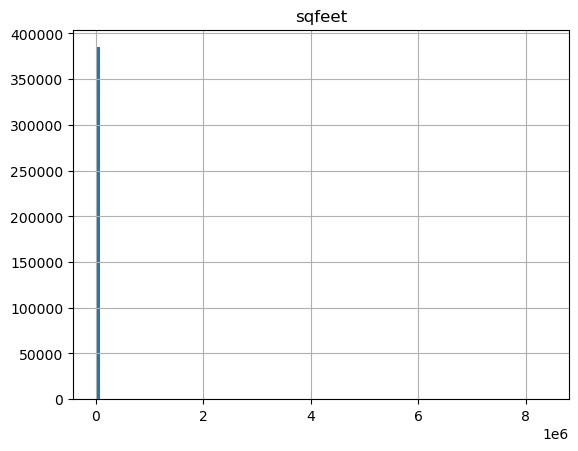

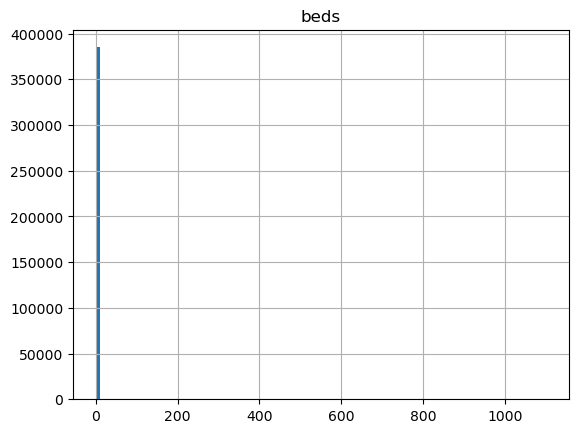

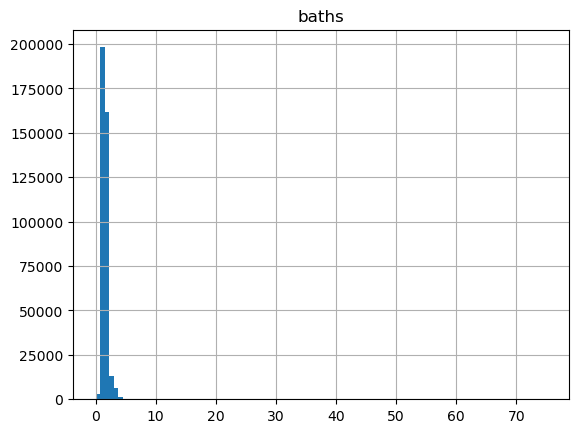

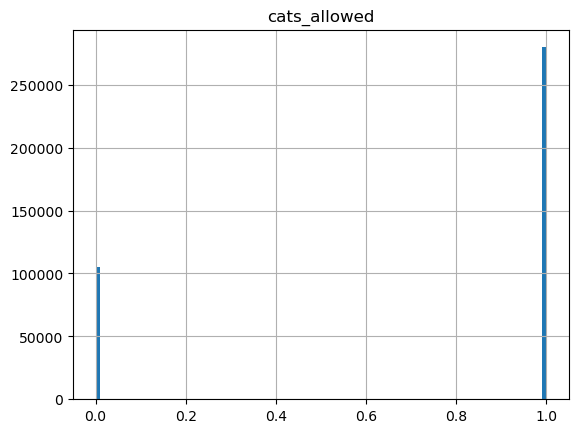

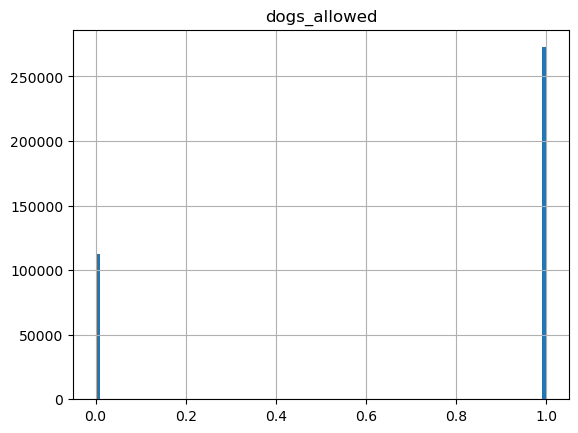

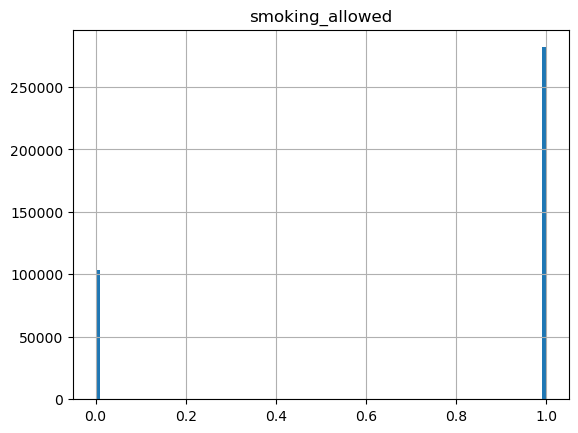

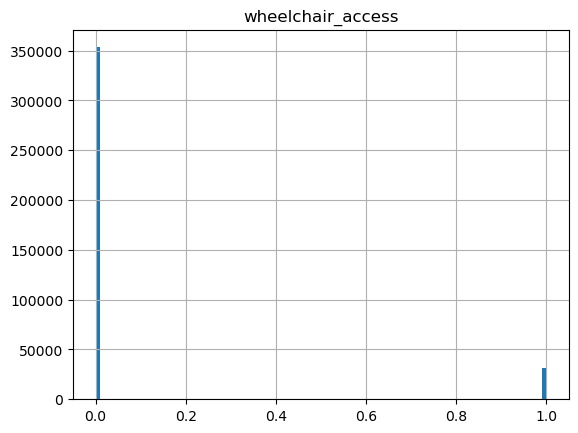

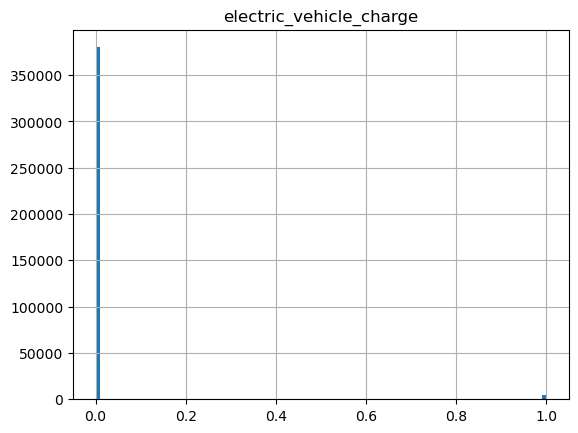

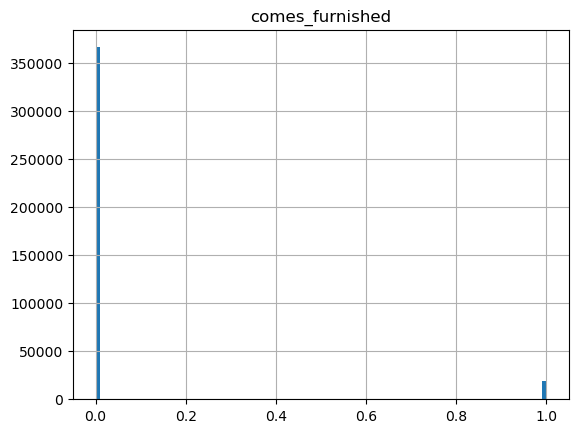

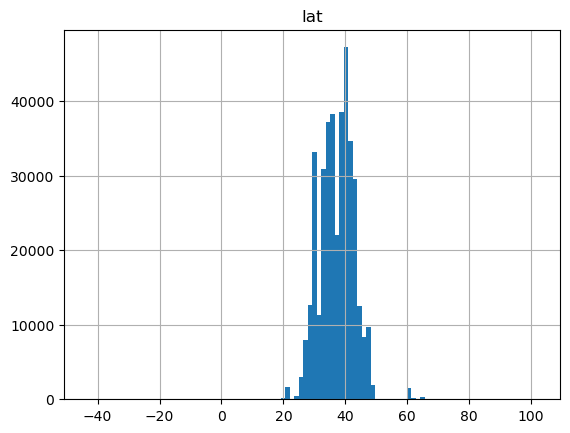

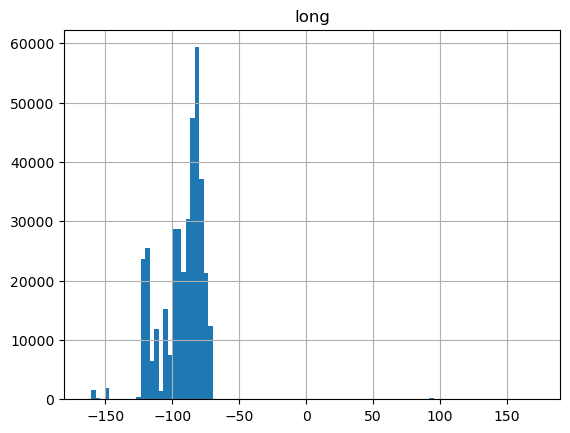

In [9]:
hist(df, bins=100)

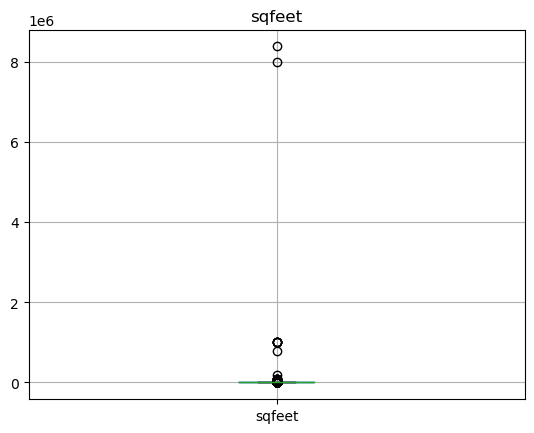

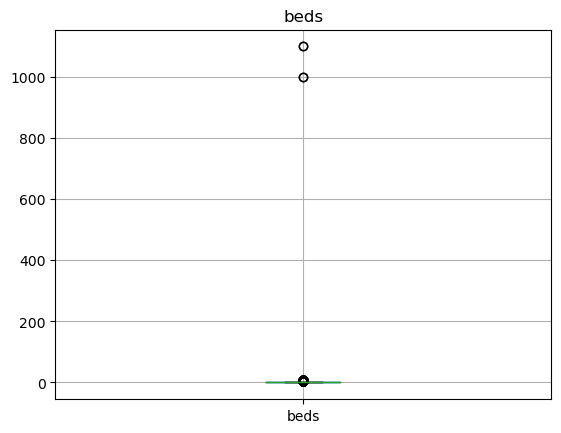

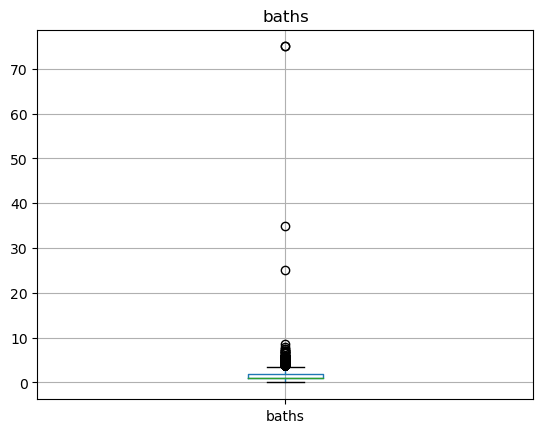

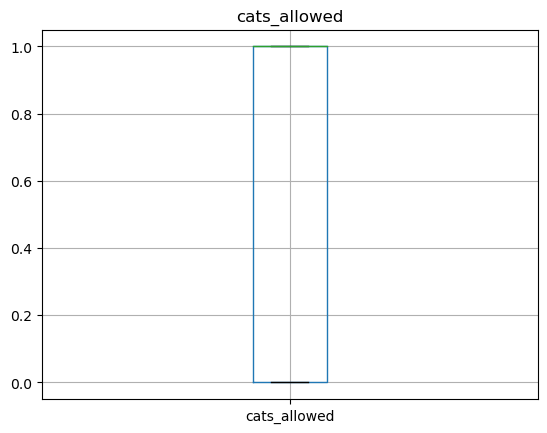

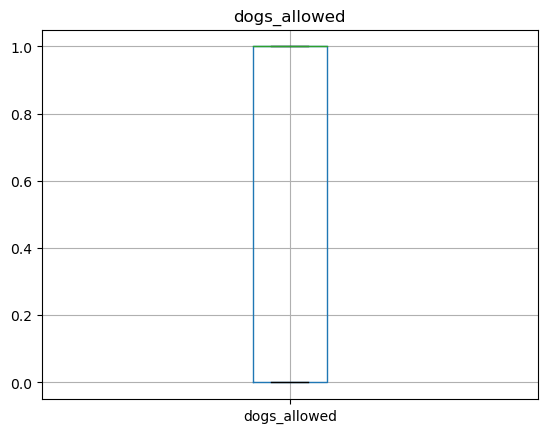

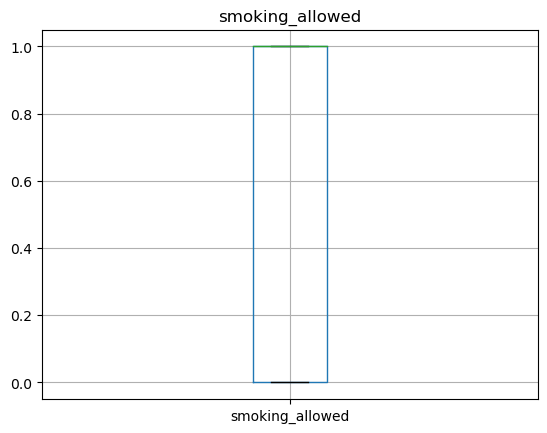

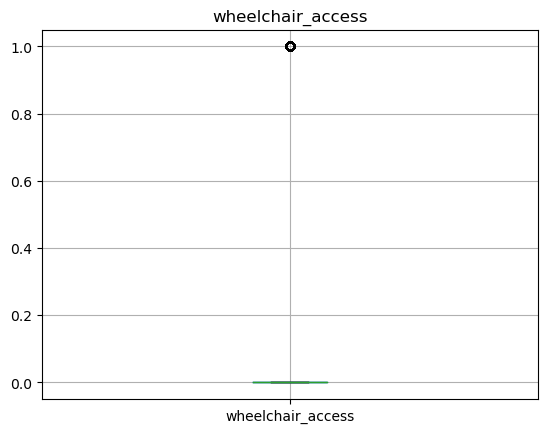

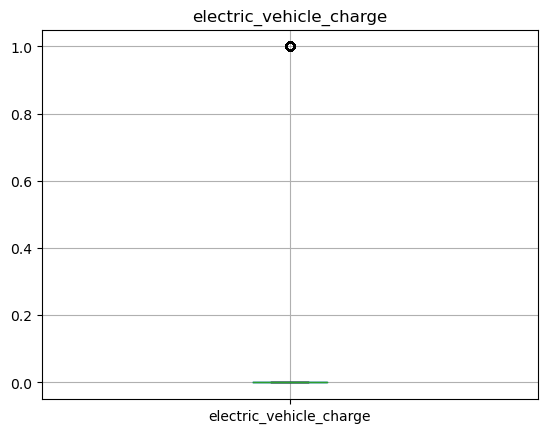

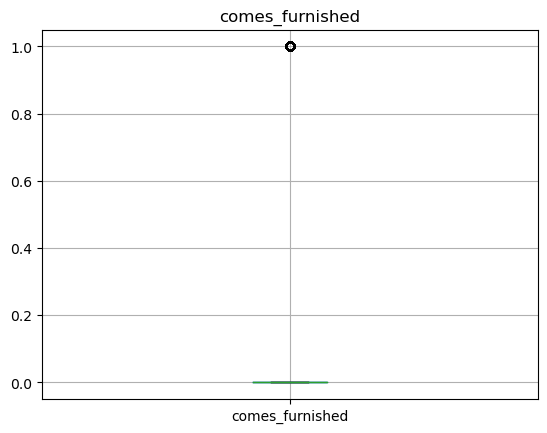

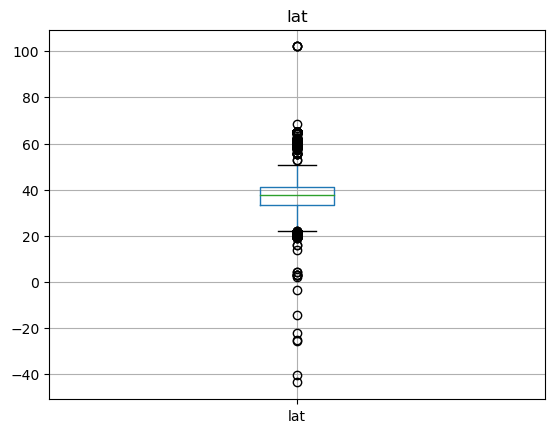

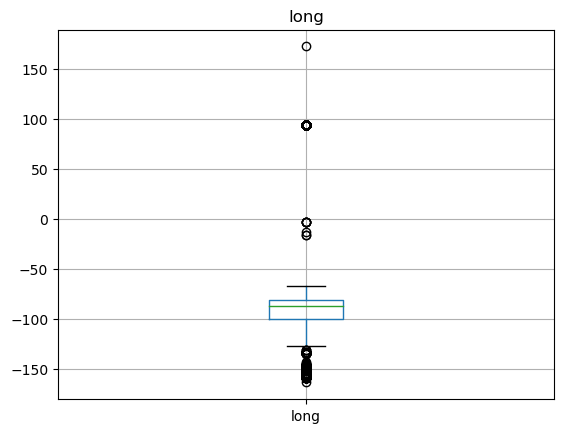

In [10]:
boxplot(df)

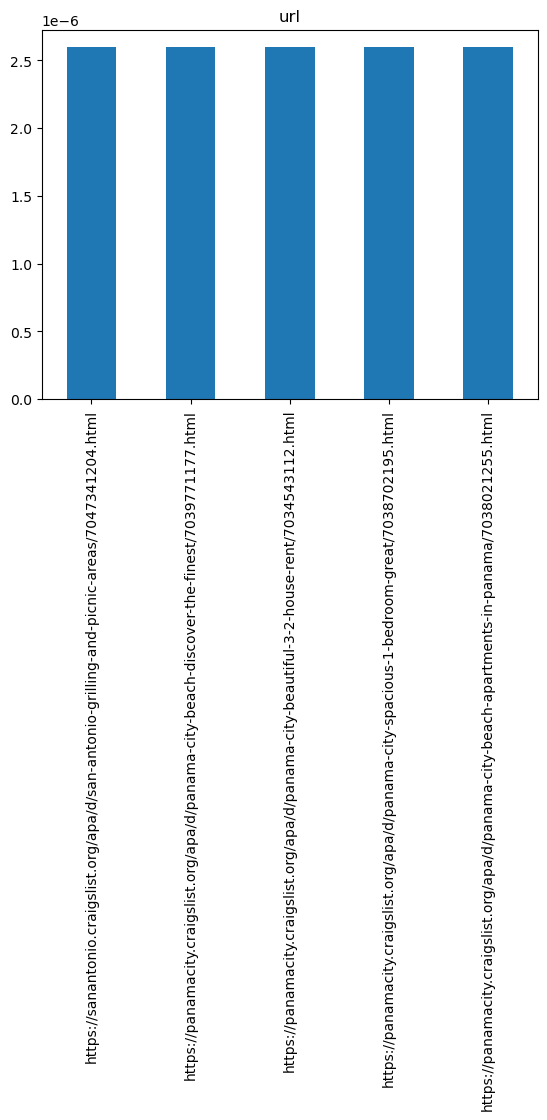

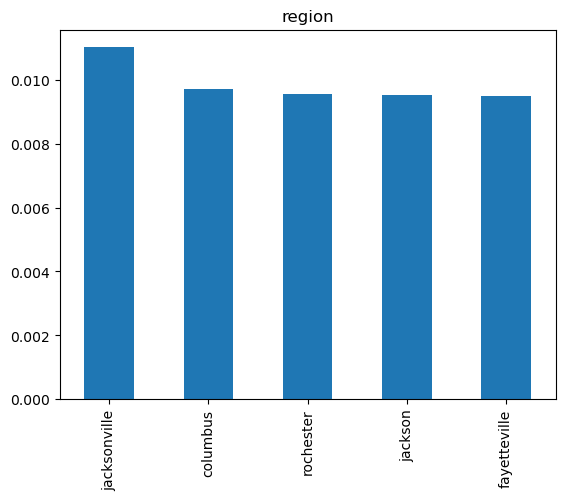

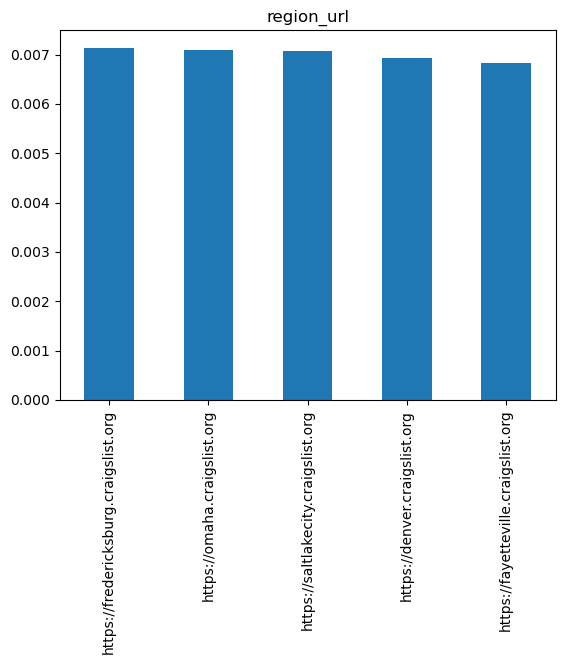

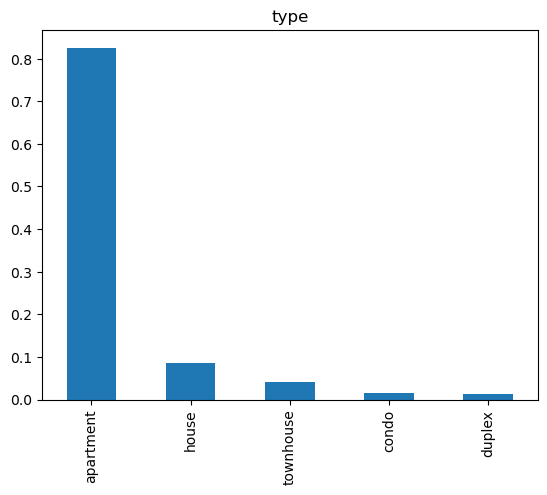

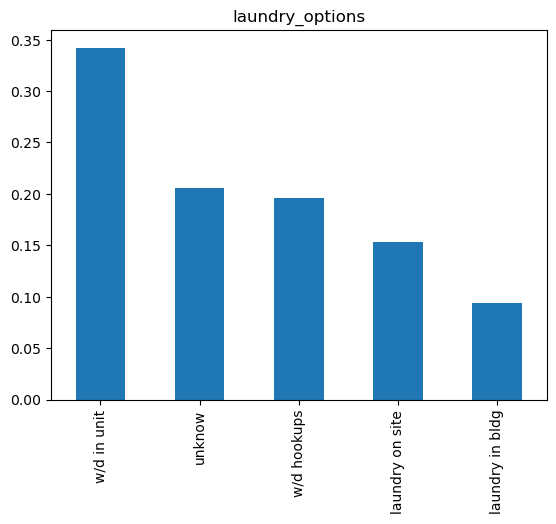

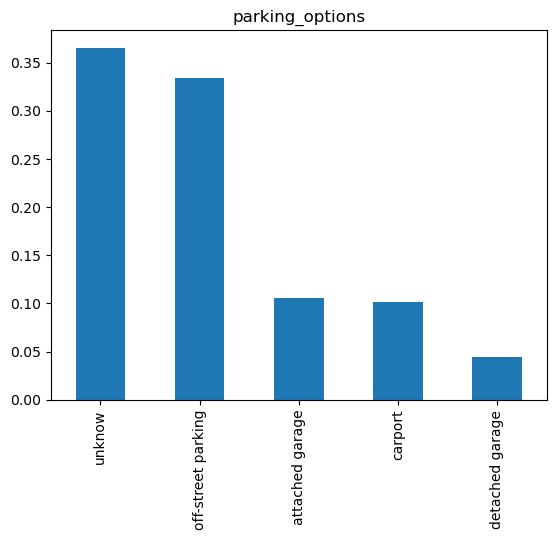

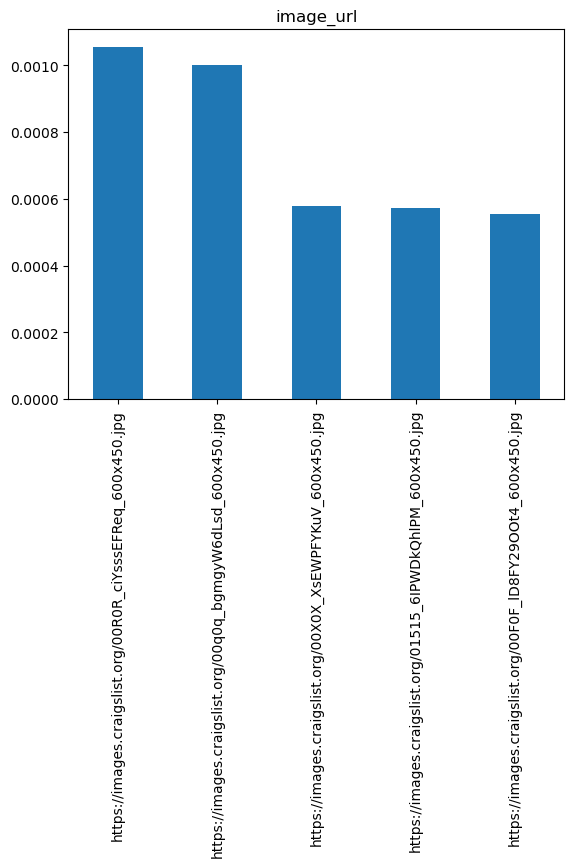

Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.


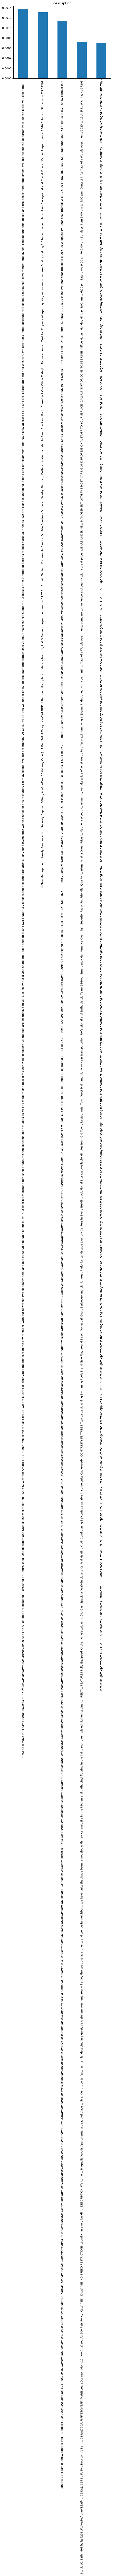

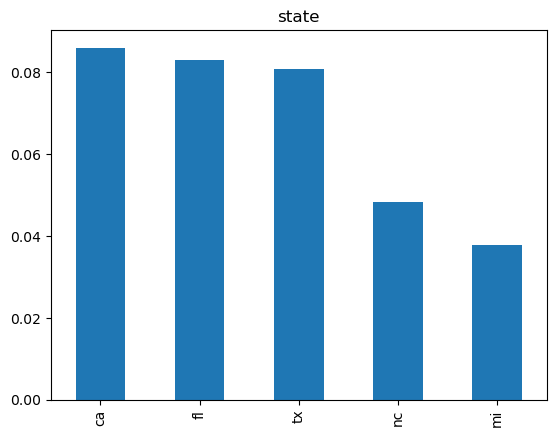

: 

In [11]:
barplot(df,top=5,freq=True)